In [1]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

import pandas as pd
from pandas.io import gbq

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


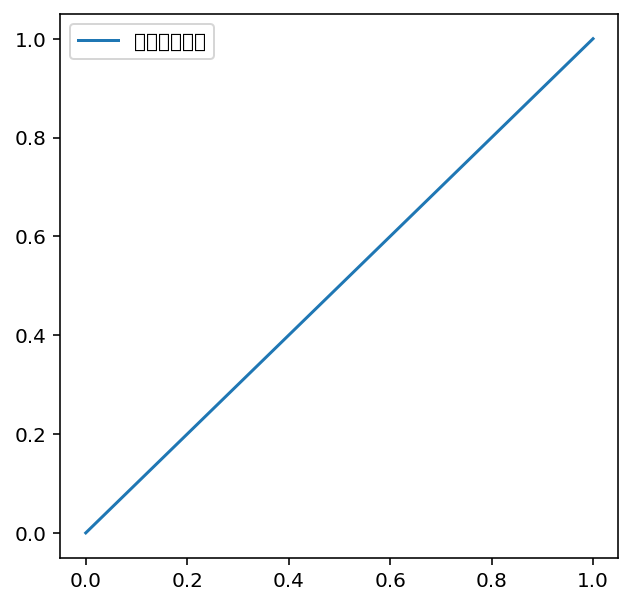

In [4]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [5]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Data_Corona'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Data_Corona


In [6]:
%cd "{PROJECT_PATH}"
!ls

/content/drive/My Drive/Data_Corona
Case.csv	  Policy.csv	   SeoulFloating.csv  TimeGender.csv
PatientInfo.csv   Region.csv	   TimeAge.csv	      TimeProvince.csv
PatientRoute.csv  SearchTrend.csv  Time.csv	      Weather.csv


In [249]:
P001= pd.read_csv('/content/drive/My Drive/Data_Corona/PatientInfo.csv')

In [8]:
import time 

In [9]:
# import pandas as pd
# from pandas.io import gbq

# # import submission file in Google Drive
# submission = pd.read_csv('/content/drive/My Drive/submission.csv')

In [10]:
# submission.to_gbq(destination_table='jeju_data_ver1.submission', 
#                   project_id='eric-dacon', 
#                   if_exists='replace')

In [11]:
# # import submission file in Google Drive
# train = pd.read_csv('/content/drive/My Drive/201901-202003.csv')

# # Connect to Google Cloud API and Upload DataFrame
# train.to_gbq(destination_table='jeju_data_ver1.201901_202003_train', 
#                   project_id='eric-dacon', 
#                   if_exists='replace')

In [12]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [13]:
# train load from v 
%%time

from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

train = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.201901_202003_train` 
  LIMIT 200000
  ''').to_dataframe()

CPU times: user 6.6 s, sys: 658 ms, total: 7.25 s
Wall time: 26 s


In [14]:
# submission load from v 

%%time
project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

submission = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.submission` 
  LIMIT 200000
  ''').to_dataframe()

CPU times: user 50 ms, sys: 0 ns, total: 50 ms
Wall time: 1.82 s


In [15]:
train.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
199995,202001,경기,가평군,기타 외국식 음식점업,경기,가평군,20s,1,2,4,124500,4
199996,202001,경기,가평군,차량용 주유소 운영업,경기,용인시 수지구,20s,2,1,3,192000,3
199997,202001,경기,고양시 덕양구,비알콜 음료점업,경기,이천시,20s,2,1,4,26200,6
199998,202001,경기,고양시 덕양구,중식 음식점업,경기,고양시 일산동구,20s,2,2,6,301500,7
199999,202001,경기,고양시 일산동구,비알콜 음료점업,경기,가평군,20s,1,1,3,43000,5


In [16]:
#01 REG_YYMM
train['REG_YYMM']
#샘플데이터 안에서는 2019년 1월부터 8월까지, 예측해야 하는 값은 2020년 4월 

0         201901
1         201905
2         201907
3         201907
4         201902
           ...  
199995    202001
199996    202001
199997    202001
199998    202001
199999    202001
Name: REG_YYMM, Length: 200000, dtype: int64

In [17]:
#02 CARD_SIDO_NM 
train['CARD_SIDO_NM'].unique()
# 총 11개의 시도 

array(['강원', '서울', '경기', '제주', '전북', '인천', '부산', '경남', '충북', '대전', '충남',
       '경북', '광주', '대구', '울산', '전남', '세종'], dtype=object)

In [18]:
#03 
train['STD_CLSS_NM'].value_counts().head(10)

체인화 편의점                  29637
한식 음식점업                  29185
비알콜 음료점업                 15529
피자 햄버거 샌드위치 및 유사 음식점업    13962
서양식 음식점업                 13600
슈퍼마켓                     12027
기타 대형 종합 소매업             11567
차량용 주유소 운영업               8275
빵 및 과자류 소매업               8156
중식 음식점업                   6129
Name: STD_CLSS_NM, dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


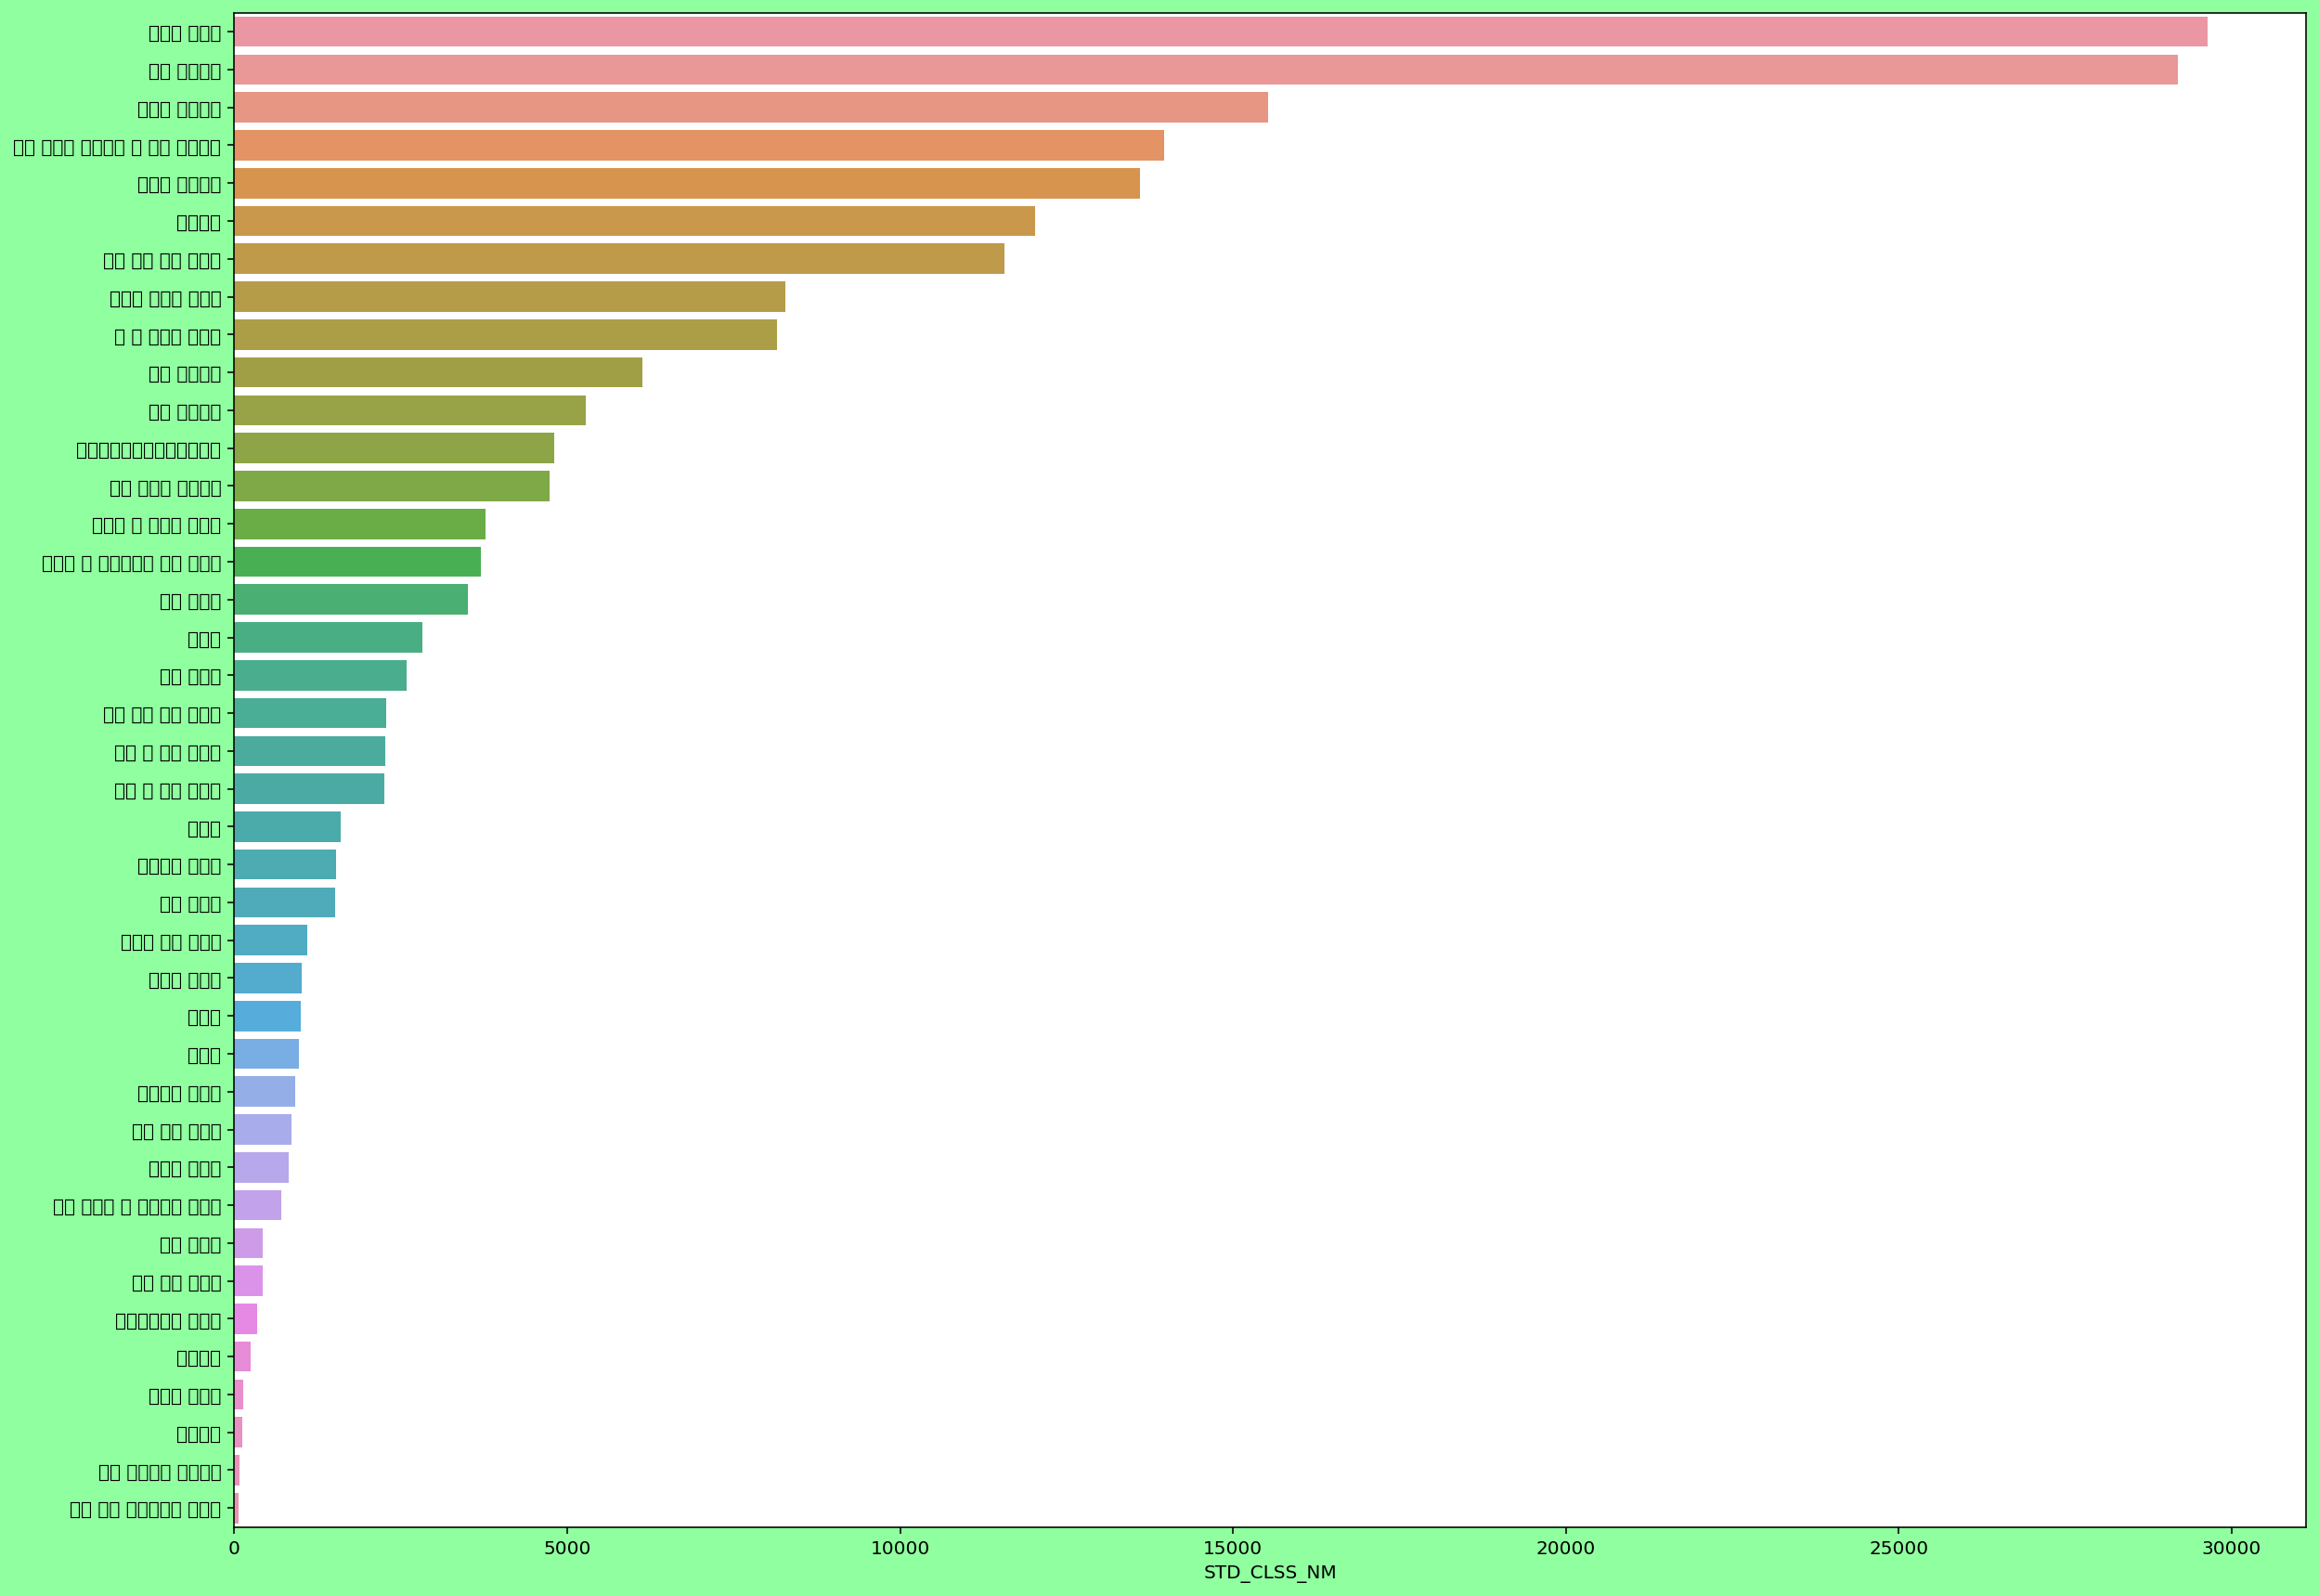

In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')
plt.rc('font', family='NanumGothic') 

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')

sns.barplot(y=train['STD_CLSS_NM'].value_counts().index, x=train['STD_CLSS_NM'].value_counts())

In [20]:
train['AGE'].value_counts()

20s    124630
40s     19537
30s     17101
50s     15329
10s     10937
60s      9507
70s      2959
Name: AGE, dtype: int64

In [21]:
train['SEX_CTGO_CD'].value_counts()

1    111926
2     88074
Name: SEX_CTGO_CD, dtype: int64

In [22]:
#FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
train['FLC'].value_counts()

1    112881
2     41761
4     21171
5     12466
3     11721
Name: FLC, dtype: int64

In [23]:
# 지역별 기준 시각화 

## 지역의 성격 
# 지역별 업종 분포도 
# 지역별 연령분포 
# 지역별 가구생애 주기 

## 매출액 
# 01. 지역별 매출액 
# 01-1. 지역별, 업종별 매출액 
# 02. 업종별 매출액 

In [24]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [25]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np 

In [26]:
city_sum = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['CNT'].sum().reset_index().sort_values('CNT',ascending=False)

In [27]:
city_sum

,CARD_SIDO_NM,STD_CLSS_NM,CNT
69,경기,체인화 편의점,3773220
253,서울,택시 운송업,2169362
32,강원,체인화 편의점,1998224
72,경기,한식 음식점업,1290652
35,강원,한식 음식점업,1074613
...,...,...,...
359,전북,일반유흥 주점업,3
189,대전,호텔업,3
292,인천,관광 민예품 및 선물용품 소매업,3
383,제주,스포츠 및 레크레이션 용품 임대업,3


In [28]:
city_sum['CARD_SIDO_NM'].unique()

array(['경기', '서울', '강원', '충남', '인천', '충북', '경북', '대전', '부산', '전북', '제주',
       '대구', '경남', '세종', '광주', '울산', '전남'], dtype=object)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


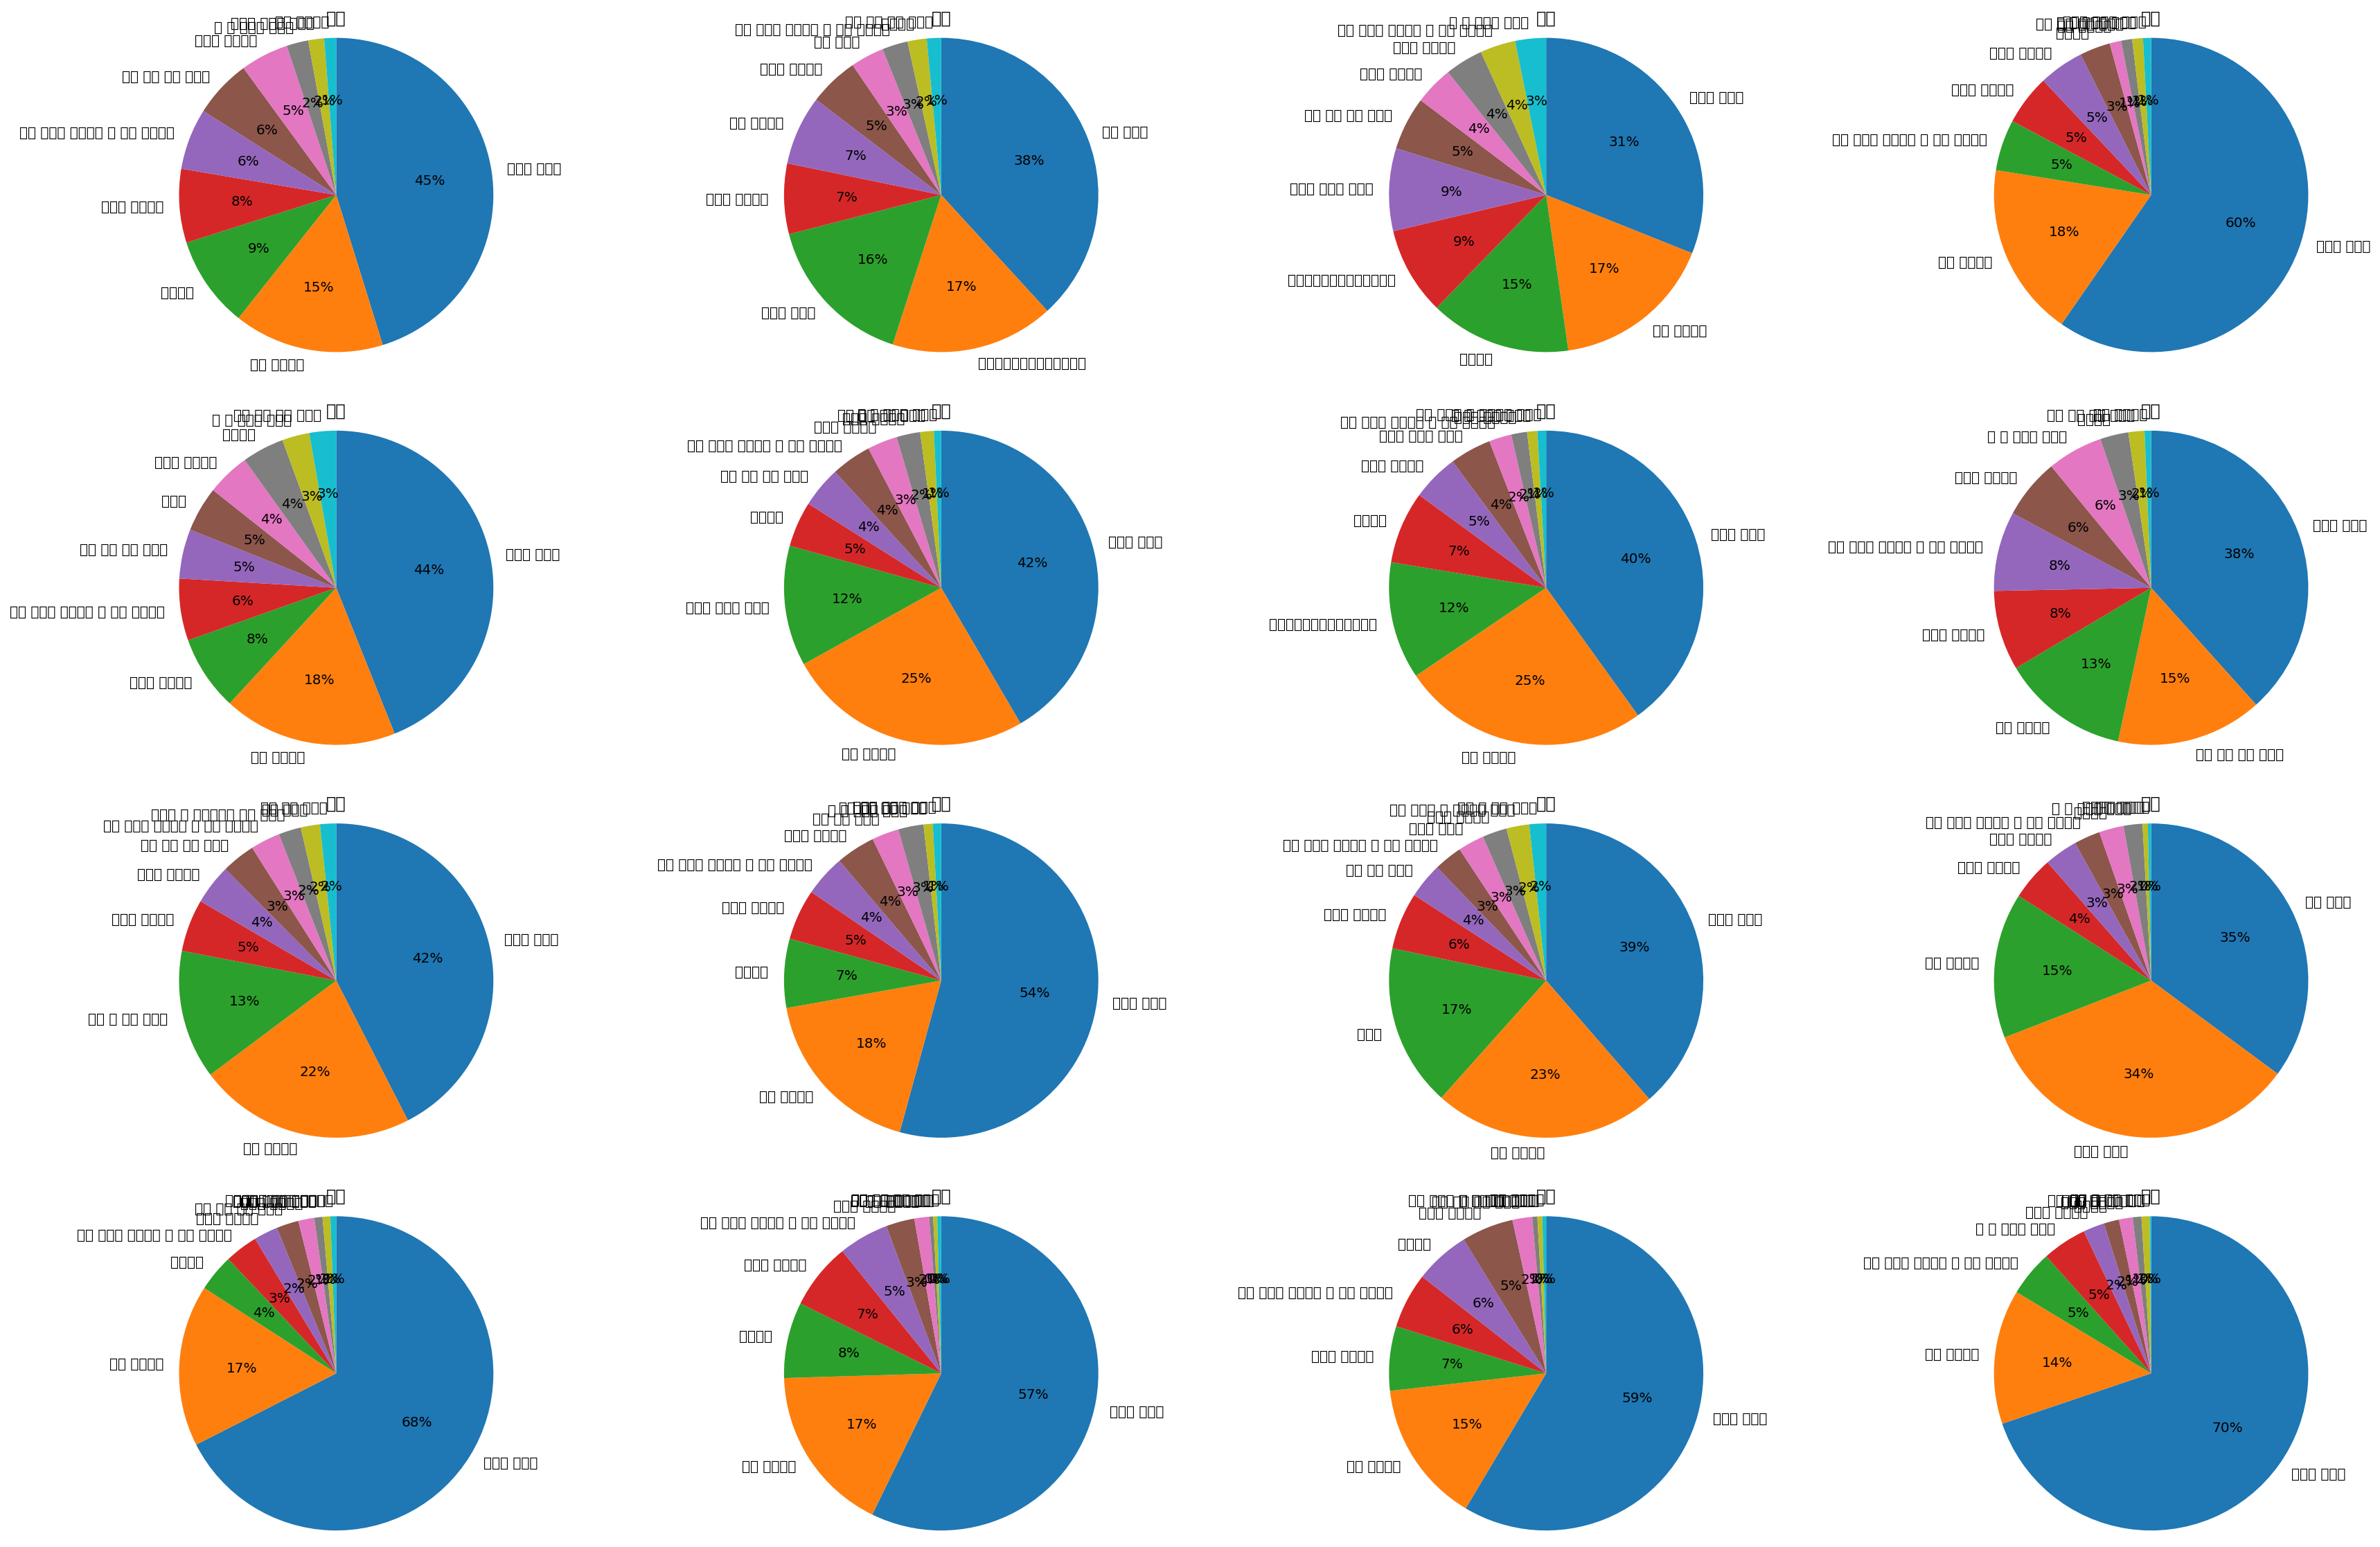

In [29]:
fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:white')

for idx,city in enumerate(city_sum['CARD_SIDO_NM'].unique()):
  if idx <=3:
     axs[0, idx].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
     axs[1, idx-4].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
     axs[2, idx-8].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
     axs[3, idx-12].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[3, idx-12].title.set_text(city)

plt.show()
        



In [30]:
# 지역별 업종 분포 코드,, 한줄로 만들어보기 

e = train[train.CARD_SIDO_NM == '강원']
f = e.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['CNT'].sum().reset_index().sort_values('CNT',ascending=False).head(10)

f.head()



,CARD_SIDO_NM,STD_CLSS_NM,CNT
32,강원,체인화 편의점,1998224
35,강원,한식 음식점업,1074613
19,강원,슈퍼마켓,934079
10,강원,기타음식료품위주종합소매업,581744
31,강원,차량용 주유소 운영업,547635


In [31]:
# 지역별 업종 분포를 알아보기 위해서, 서울 지역의 업종 분포를 찾아보자.

b = train[train.CARD_SIDO_NM == '서울']
c = b.groupby(b['STD_CLSS_NM'])['CNT'].sum().reset_index()
d = c.sort_values('CNT', ascending=False).head(10)
d


,STD_CLSS_NM,CNT
32,택시 운송업,2169362
8,기타음식료품위주종합소매업,953844
31,체인화 편의점,907662
13,비알콜 음료점업,411954
34,한식 음식점업,405830
15,서양식 음식점업,289681
12,버스 운송업,195495
33,피자 햄버거 샌드위치 및 유사 음식점업,149879
17,슈퍼마켓,111853
5,기타 대형 종합 소매업,83606


In [32]:
label = d['STD_CLSS_NM']
counts = d['CNT']

In [33]:
plt.figure(1, figsize=(60,30))
the_grid = GridSpec(2,2)

<Figure size 4320x2160 with 0 Axes>

In [34]:
cmap = plt.get_cmap('Spectral')

In [35]:
colors = [cmap(i) for i in np.linspace(0,1,8)]

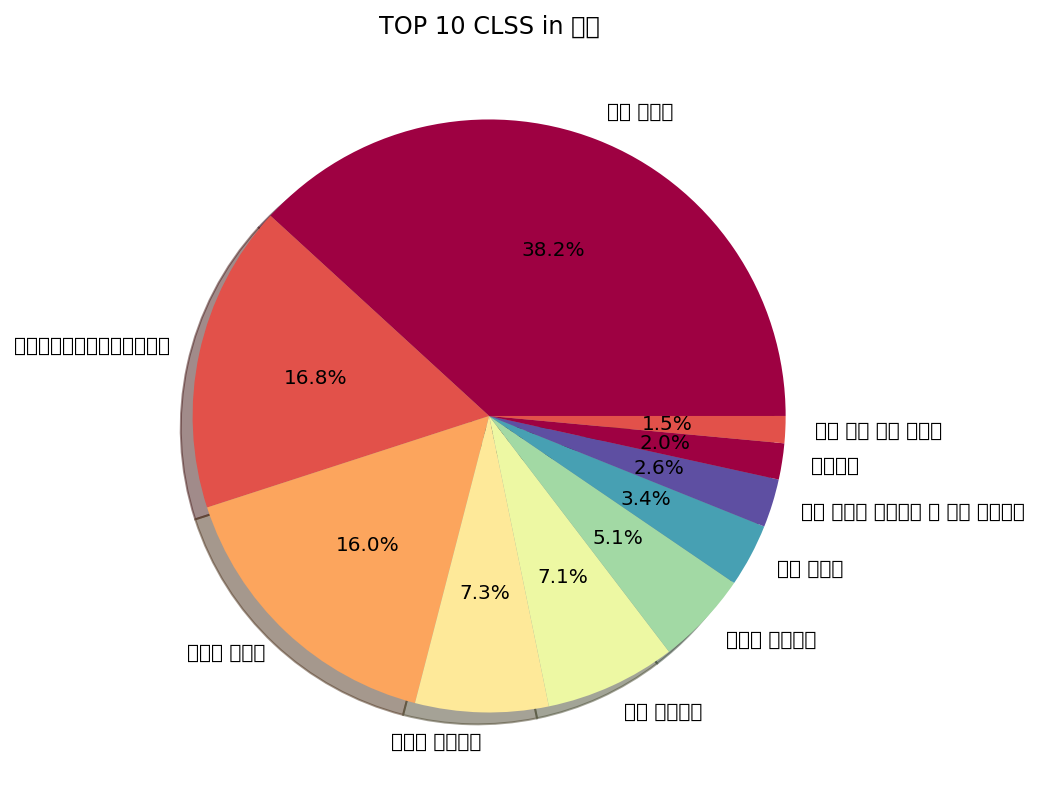

In [36]:
# 서울지역 업종분포 시각화 

plt.figure(1, figsize=(45,15))
the_grid = GridSpec(2,2)

plt.subplot(the_grid[0,1], aspect=1, title='TOP 10 CLSS in 서울')
source_pie = plt.pie(counts, labels=label, autopct='%1.1f%%', shadow=True, colors=colors)

plt.show( )

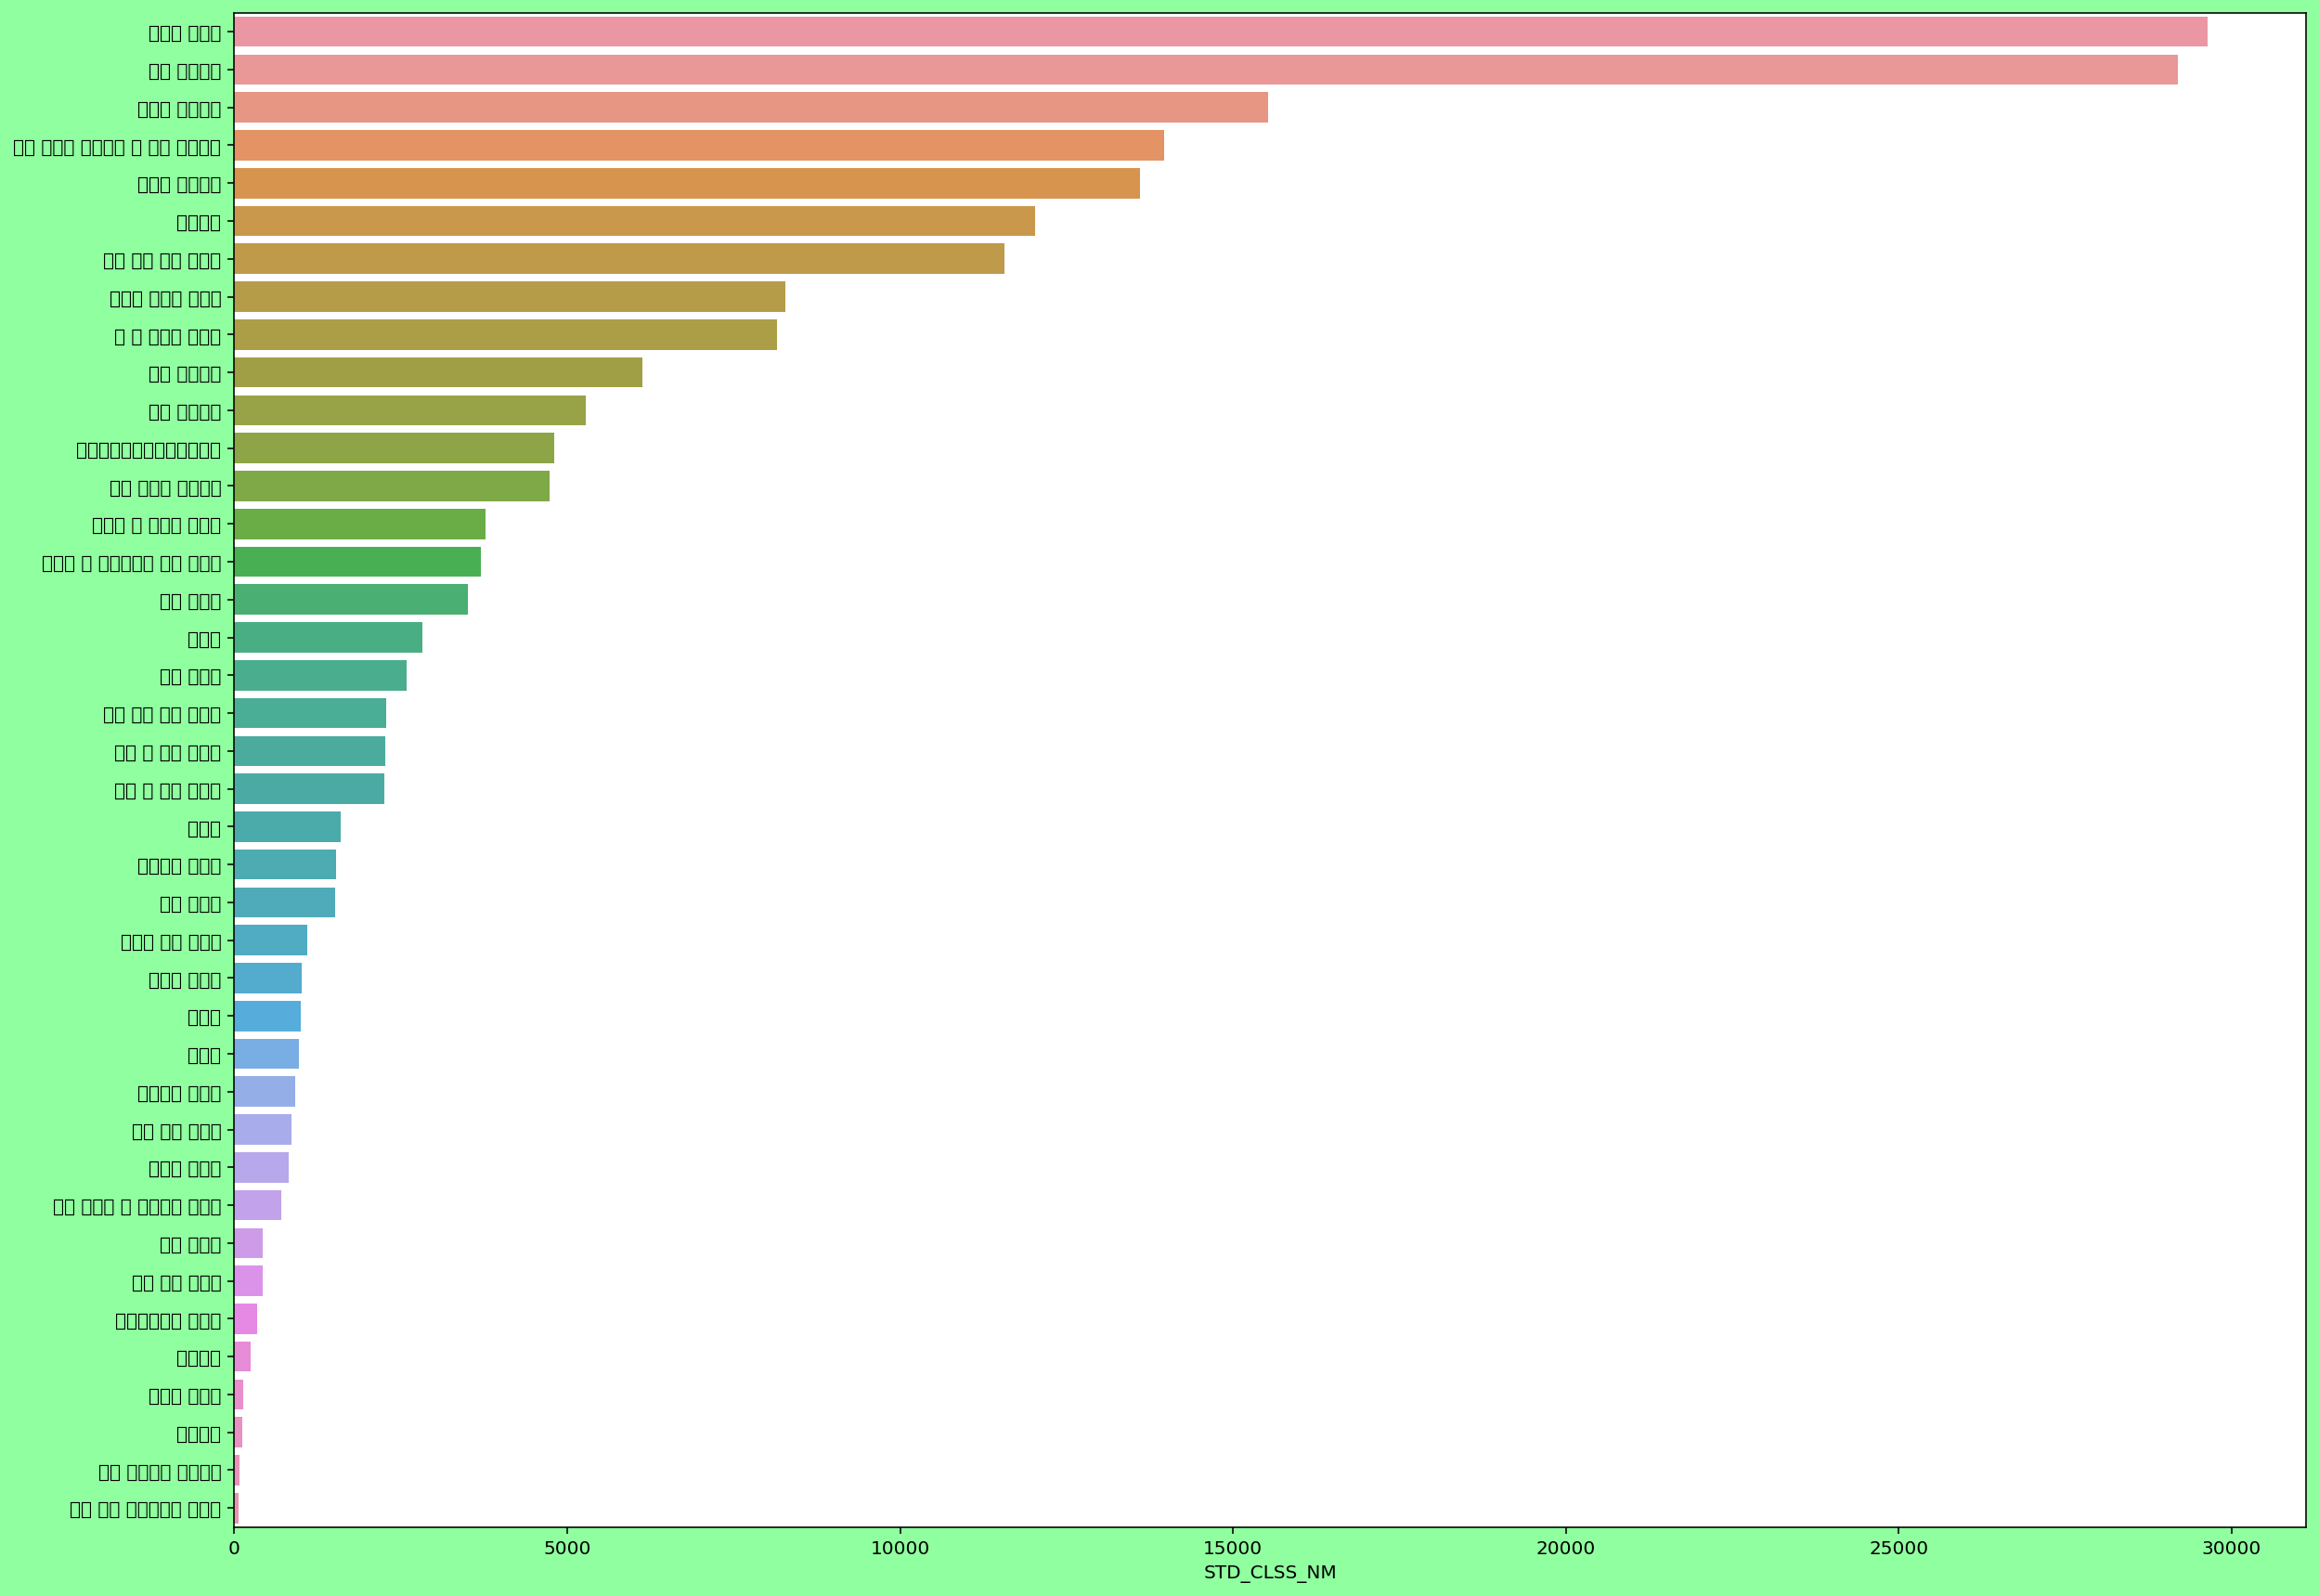

In [37]:
# 업종별 등장 빈도수 

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=train['STD_CLSS_NM'].value_counts().index, x=train['STD_CLSS_NM'].value_counts())

In [38]:
stuff = train.groupby('STD_CLSS_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
stuff.head()

,STD_CLSS_NM,CNT,CSTMR_CNT
0,건강보조식품 소매업,3332,3041
1,골프장 운영업,15981,11110
2,과실 및 채소 소매업,73548,51806
3,관광 민예품 및 선물용품 소매업,5583,4179
4,그외 기타 스포츠시설 운영업,529,394


In [39]:
def make_bar(train, x_col, y_col): 
  fig = plt.figure(figsize=(14,7))
  fig.patch.set_facecolor('xkcd:white')
  sns.barplot(x=x_col, y=y_col, data = train.sort_values(x_col, ascending=False))
  plt.title(x_col)
  plt.show()

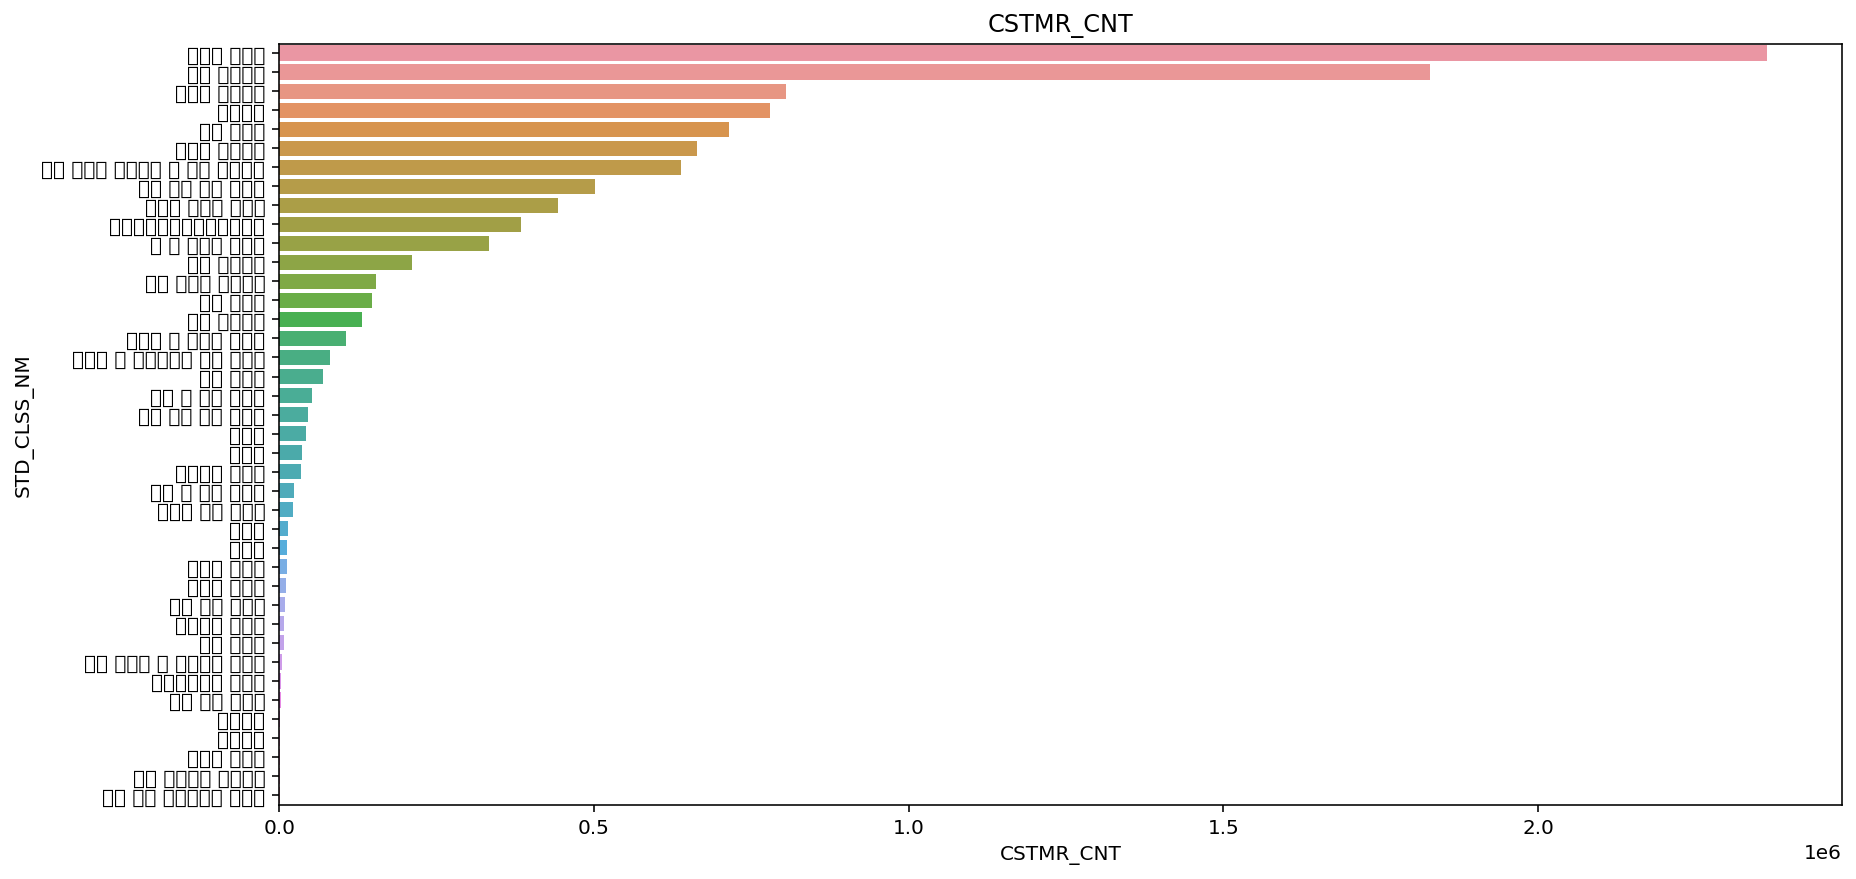

In [40]:
#이용고객수 
make_bar(stuff,'CSTMR_CNT','STD_CLSS_NM')

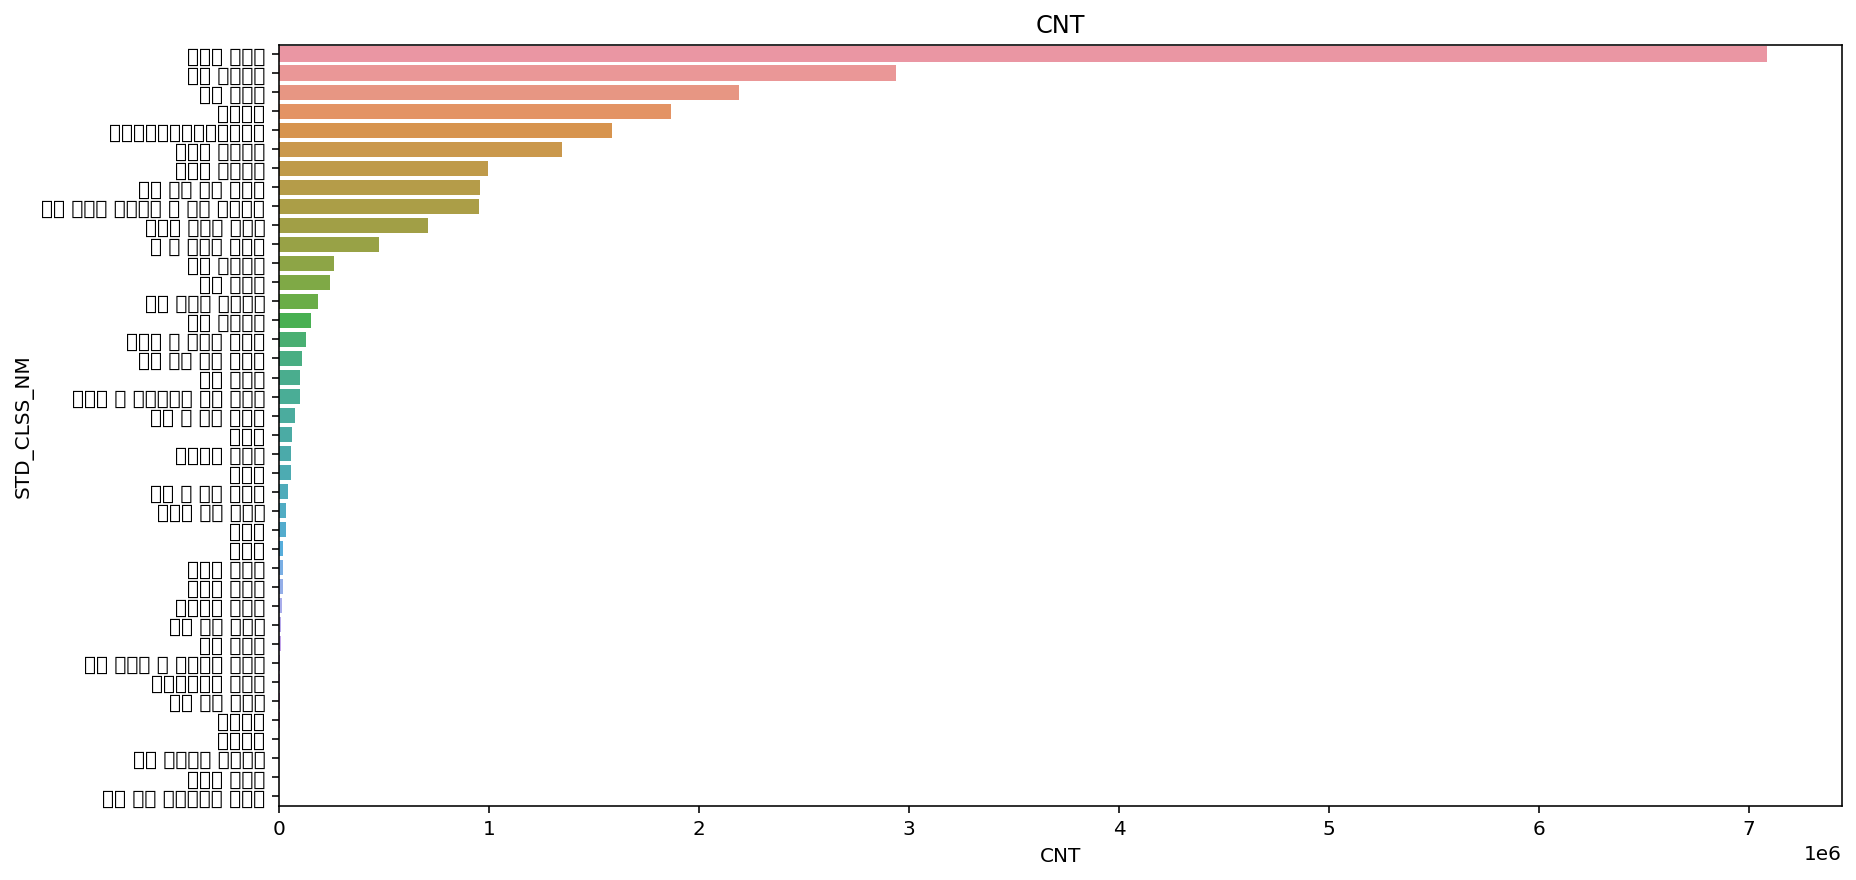

In [41]:
#이용 횟수 
make_bar(stuff,'CNT','STD_CLSS_NM')

In [42]:
train['gap'] = train['CNT'] - train['CSTMR_CNT']

In [43]:
train.loc[train['gap'] <0,'mark'] = '취소있음'
train.loc[train['gap'] ==0,'mark'] = '고객다름'
train.loc[train['gap'] >0,'mark'] = '단골있음'

In [44]:
gap=train.groupby('STD_CLSS_NM')['mark'].value_counts().reset_index(name='count')
gap.head()

,STD_CLSS_NM,mark,count
0,건강보조식품 소매업,고객다름,156
1,건강보조식품 소매업,단골있음,153
2,건강보조식품 소매업,취소있음,31
3,골프장 운영업,단골있음,613
4,골프장 운영업,고객다름,211


In [45]:
df = gap.groupby('STD_CLSS_NM')['count'].sum().reset_index()
df01 = df.merge(gap[gap['mark']=='취소있음'][['STD_CLSS_NM','count']], on='STD_CLSS_NM')

In [46]:
df01.rename(columns = {'count_x': 'total',
                       'count_y': 'cancel_count'},inplace=True)
df01.head(5)

,STD_CLSS_NM,total,cancel_count
0,건강보조식품 소매업,340,31
1,그외 기타 종합 소매업,2279,15
2,기타 대형 종합 소매업,11567,6
3,기타 외국식 음식점업,4730,32
4,기타음식료품위주종합소매업,4812,1


In [47]:
df01['rate'] = df01['cancel_count']/df01['total']
df01 = df01.sort_values('rate',ascending=False, ignore_index=True)
df01.head()

,STD_CLSS_NM,total,cancel_count,rate
0,정기 항공 운송업,858,298,0.347319
1,건강보조식품 소매업,340,31,0.091176
2,내항 여객 운송업,429,32,0.074592
3,여행사업,249,13,0.052209
4,스포츠 및 레크레이션 용품 임대업,3710,104,0.028032


In [48]:
df02 = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])[['CSTMR_CNT','CNT']].sum().reset_index()
df02.head()

,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_CNT,CNT
0,강원,건강보조식품 소매업,2269,2422
1,강원,골프장 운영업,10012,14570
2,강원,과실 및 채소 소매업,36009,51731
3,강원,관광 민예품 및 선물용품 소매업,988,1160
4,강원,그외 기타 스포츠시설 운영업,151,208


In [49]:
df02[df02['CSTMR_CNT']>df02['CNT']]

,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_CNT,CNT
362,전북,정기 항공 운송업,994,969
392,제주,정기 항공 운송업,1490,1474


In [50]:
# 월별로 이용고객의 추이를 확인할 필요가 있음. 

In [51]:
#날짜별 이용 건수 

In [52]:
df03 = train.groupby('REG_YYMM')[['CSTMR_CNT','CNT']].sum().reset_index()
df03.tail()

,REG_YYMM,CSTMR_CNT,CNT
10,201911,505164,1084693
11,201912,515254,1134434
12,202001,476741,976699
13,202002,390320,792642
14,202003,323951,706909


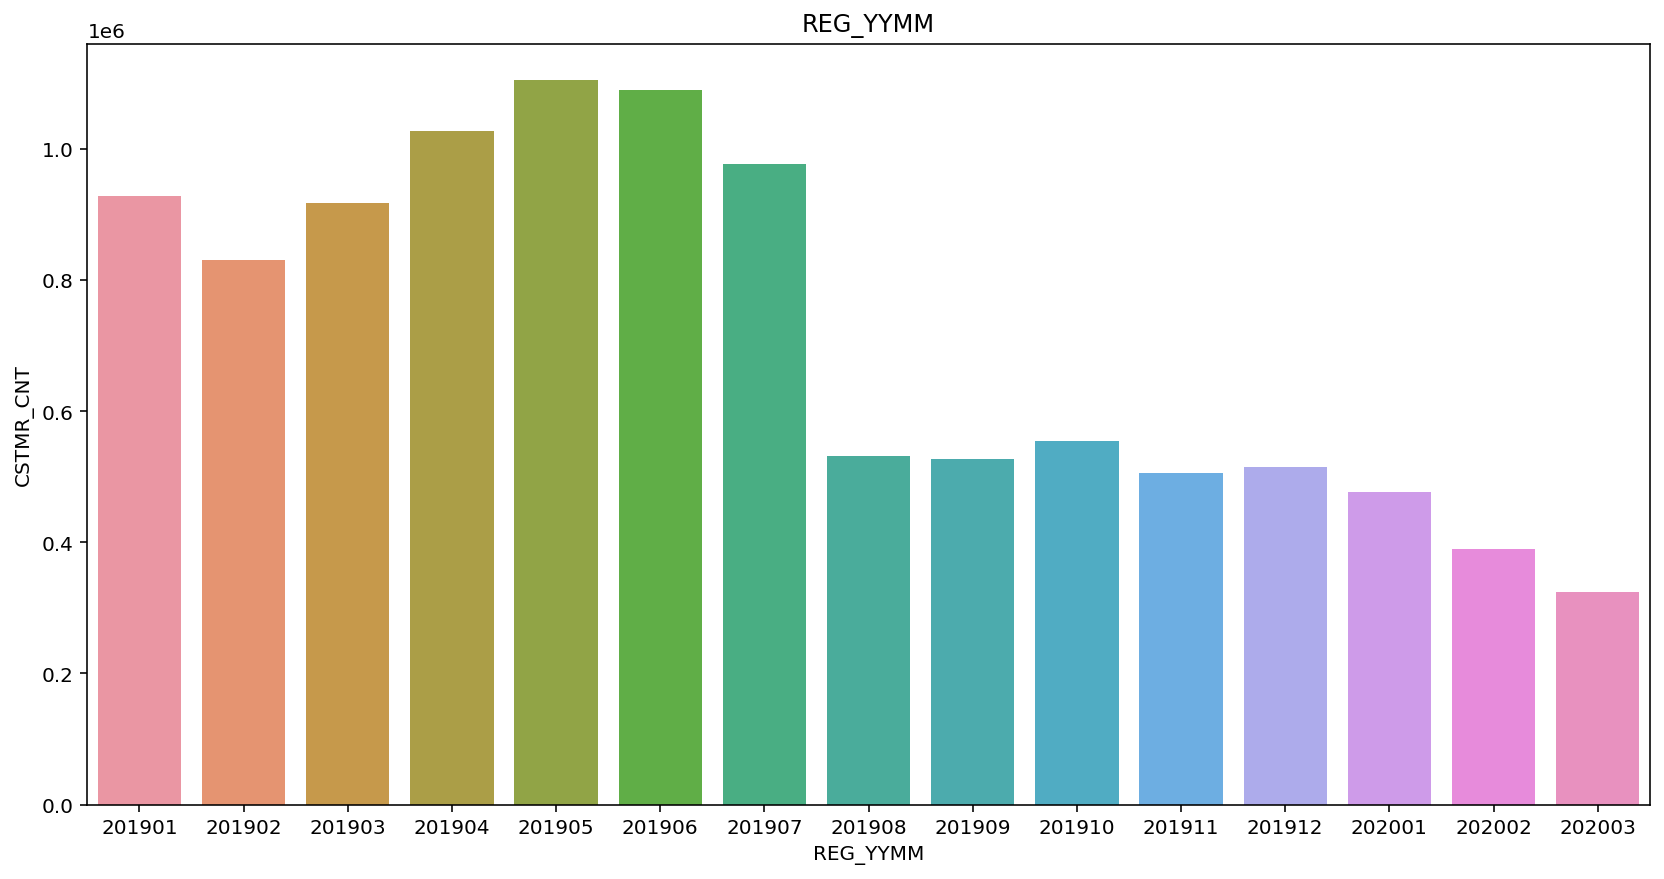

In [53]:
make_bar(df03, 'REG_YYMM', 'CSTMR_CNT')

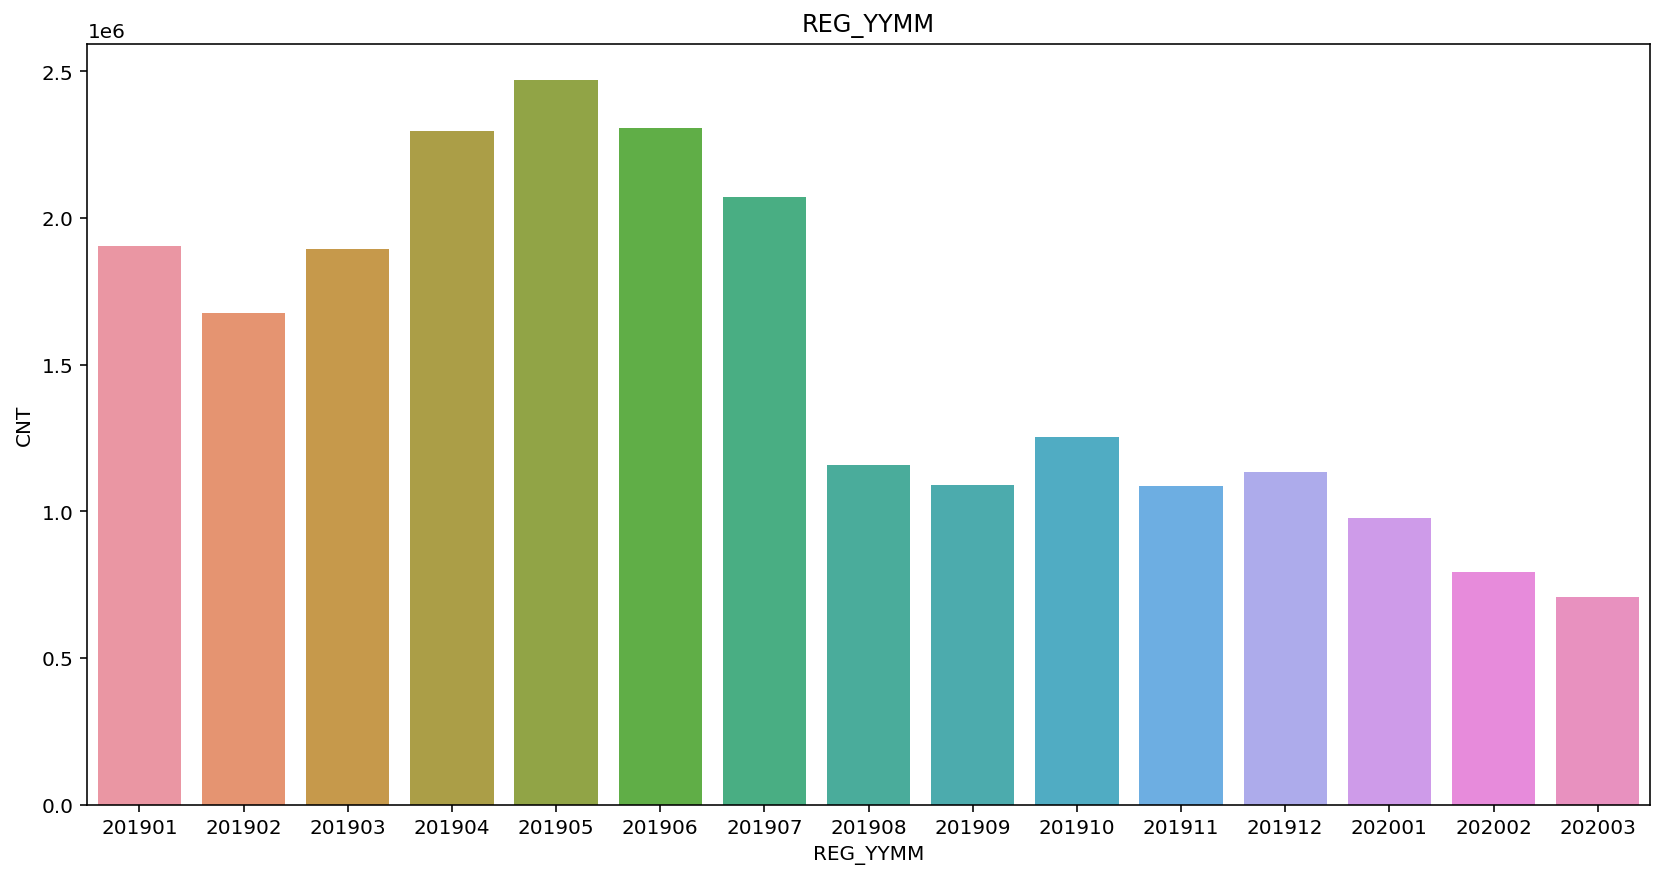

In [54]:
make_bar(df03, 'REG_YYMM', 'CNT')

In [55]:
train.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,gap,mark
199995,202001,경기,가평군,기타 외국식 음식점업,경기,가평군,20s,1,2,4,124500,4,0,고객다름
199996,202001,경기,가평군,차량용 주유소 운영업,경기,용인시 수지구,20s,2,1,3,192000,3,0,고객다름
199997,202001,경기,고양시 덕양구,비알콜 음료점업,경기,이천시,20s,2,1,4,26200,6,2,단골있음
199998,202001,경기,고양시 덕양구,중식 음식점업,경기,고양시 일산동구,20s,2,2,6,301500,7,1,단골있음
199999,202001,경기,고양시 일산동구,비알콜 음료점업,경기,가평군,20s,1,1,3,43000,5,2,단골있음


In [56]:
df03['REG_YYMM'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003])

In [57]:
submission.tail()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
1389,1316,202007,충남,그외 기타 분류안된 오락관련 서비스업,0.0
1390,1317,202007,충남,그외 기타 스포츠시설 운영업,0.0
1391,1353,202007,충북,건강보조식품 소매업,0.0
1392,1357,202007,충북,그외 기타 분류안된 오락관련 서비스업,0.0
1393,1358,202007,충북,그외 기타 스포츠시설 운영업,0.0


In [58]:
import os
for dirname, _, filenames in os.walk('E:\\Eric_Github\\Dacon\\data_jeju'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [59]:
#train.groupby(['confirmed_date','patient_id'])['STD_CLSS_NM'].value_counts().reset_index(name='count')

#train.groupby(['confirmed_date','patient_id'])['STD_CLSS_NM'].value_counts().reset_index(name='count')

a002 = P001.groupby('confirmed_date')['confirmed_date','patient_id','province']
a003 = P001.groupby(['confirmed_date','patient_id'])
a004 = P001.groupby(['confirmed_date','patient_id'])['province']

In [283]:
P001 = P001.replace({'province':'Gyeonggi-do'}, 'Gyeonggido')
P001 = P001.replace({'province':'Gangwon-do'}, 'Gangwondo') 
P001 = P001.replace({'province':'Chungcheongbuk-do'}, 'Chungcheongbukdo')
P001 = P001.replace({'province':'Chungcheongnam-do'}, 'Chungcheongnamdo') 
P001 = P001.replace({'province':'Jeollabuk-do'}, 'Jeollabukdo')
P001 = P001.replace({'province':'Jeollanam-do'}, 'Jeollanamdo') 
P001 = P001.replace({'province':'Gyeongsangbuk-do'}, 'Gyeongsangbukdo')
P001 = P001.replace({'province':'Gyeongsangnam-do'}, 'Gyeongsangnamdo') 
P001 = P001.replace({'province':'Jeju-do'}, 'Jejudo') 


In [61]:
day_list = P001['confirmed_date'].unique()
day_list = list(day_list)
len(day_list)

149

In [62]:
a006 = P001[P001['confirmed_date']=='2020-06-08']['patient_id'].value_counts().sum()

In [63]:
# dict 형태로, day_list + a005 

In [64]:
#각 날짜별, 지역별로 환자가 몇 명 있었는지 구하여라
b =[]
for date in day_list:
  a005 = P001[P001['confirmed_date']==date]['patient_id'].value_counts().sum()
  b.append(a005)
  #print(a005)

#a006 = P001[P001['confirmed_date']=='2020-06-08']['patient_id'].value_counts().sum()


In [284]:
#서울지역 정보 
S001 = P001[P001['province']=='Seoul']

P001['province'].unique()
#17개 시,도

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggido', 'Sejong', 'Ulsan', 'Gangwondo', 'Chungcheongbukdo',
       'Chungcheongnamdo', 'Jeollabukdo', 'Jeollanamdo',
       'Gyeongsangbukdo', 'Gyeongsangnamdo', 'Jejudo'], dtype=object)

In [285]:
p001 = list(P001['province'].unique())

for i in p001:
  globals()['S00_{}'.format(i)]= P001[P001['province']=='i']
  print('S00_{}'.format(i))

S00_Seoul
S00_Busan
S00_Daegu
S00_Gwangju
S00_Incheon
S00_Daejeon
S00_Gyeonggido
S00_Sejong
S00_Ulsan
S00_Gangwondo
S00_Chungcheongbukdo
S00_Chungcheongnamdo
S00_Jeollabukdo
S00_Jeollanamdo
S00_Gyeongsangbukdo
S00_Gyeongsangnamdo
S00_Jejudo


In [66]:
S001.tail()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1307,1000001308,NaN,NaN,Korea,Seoul,Mapo-gu,Richway,1000001290,NaN,NaN,2020-06-29,NaN,NaN,isolated
1308,1000001309,NaN,NaN,Korea,Seoul,Mapo-gu,Richway,1000001290,NaN,NaN,2020-06-29,NaN,NaN,isolated
1309,1000001310,NaN,NaN,Korea,Seoul,Geumcheon-gu,contact with patient,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
1310,1000001311,NaN,NaN,Korea,Seoul,etc,NaN,NaN,NaN,NaN,2020-06-29,NaN,NaN,isolated
1311,1000001312,NaN,NaN,Korea,Seoul,Eunpyeong-gu,NaN,NaN,NaN,2020-06-24,2020-06-29,NaN,NaN,isolated


In [67]:
#서울 지역에 있는 환자 숫자 총합 구하기 
a =[]
for date in day_list:
  s001 = S001[S001['confirmed_date']==date]['patient_id'].value_counts().sum()
  a.append(s001)
  #print(a005)

#a006 = P001[P001['confirmed_date']=='2020-06-08']['patient_id'].value_counts().sum()


In [68]:
#dict 형태로 변환 

list_A = [ x for x in zip(day_list,a) ]
list_A = pd.DataFrame(list_A)
list_A.columns =["confirmed_date","total_patient"]
list_A

#그다음에 할꺼.. 흠.. 
#confirmed_date 월별로 나눈 다음에.. 월별 total_patient 합계 구하고.. REG_YYMM 형태로(201901) 만들어서, train 데이터에 merge 시키기. 
#시키고 나서 모델 돌리고, rmse 낮아졌나 안 낮아졌나 확인해보기 ~ 

list_A


,confirmed_date,total_patient
0,2020-01-23,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
144,2020-02-01,0
145,2020-02-09,0
146,2020-02-10,0
147,2020-04-29,0


In [69]:
# 목표: list_A 값 나누고 가자.. 

In [70]:
list_A['confirmed_date'] = pd.to_datetime(list_A.confirmed_date, errors='coerce')

In [71]:
list_A['month_date'] = list_A['confirmed_date'].dt.strftime('%m')

In [72]:
list_A['year_date'] = list_A['confirmed_date'].dt.strftime('%Y')

In [73]:
# Train_date 안에서 년, 월 구분하기   .dt.strftime('%Y-%m-%d')

In [74]:
T001 = train.copy()

In [76]:
T001['REG_YYMM_01'] = pd.to_datetime(T001['REG_YYMM'], format='%Y%m', errors ='coerce').dropna()

In [77]:
T001.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,gap,mark,REG_YYMM_01
0,201901,강원,화천군,화장품 및 방향제 소매업,강원,화천군,10s,2,1,4,30150,5,1,단골있음,2019-01-01
1,201905,강원,평창군,기타음식료품위주종합소매업,강원,평창군,10s,2,1,7,94310,26,19,단골있음,2019-05-01
2,201907,강원,양양군,체인화 편의점,강원,양양군,10s,2,1,51,342300,120,69,단골있음,2019-07-01
3,201907,서울,동작구,택시 운송업,강원,정선군,10s,1,1,8,111500,19,11,단골있음,2019-07-01
4,201902,서울,중구,택시 운송업,강원,속초시,10s,1,1,45,558670,153,108,단골있음,2019-02-01


In [78]:
T001['month_date'] = T001['REG_YYMM_01'].dt.strftime('%m')

In [79]:
T001['year_date'] = T001['REG_YYMM_01'].dt.strftime('%Y')

In [80]:
T001.year_date.unique()

array(['2019', '2020'], dtype=object)

In [81]:
T001['CARD_SIDO_NM'].unique()

array(['강원', '서울', '경기', '제주', '전북', '인천', '부산', '경남', '충북', '대전', '충남',
       '경북', '광주', '대구', '울산', '전남', '세종'], dtype=object)

In [82]:
#서울지역만 한정시켜보자 
T002 = T001[T001['CARD_SIDO_NM']=='서울'] 

In [83]:
len(list_A)

149

In [84]:
T002.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,gap,mark,REG_YYMM_01,month_date,year_date
3,201907,서울,동작구,택시 운송업,강원,정선군,10s,1,1,8,111500,19,11,단골있음,2019-07-01,07,2019
4,201902,서울,중구,택시 운송업,강원,속초시,10s,1,1,45,558670,153,108,단골있음,2019-02-01,02,2019
8,201901,서울,서초구,버스 운송업,강원,동해시,10s,1,1,7,93600,10,3,단골있음,2019-01-01,01,2019
9,201903,서울,구로구,버스 운송업,강원,평창군,10s,2,1,6,84900,16,10,단골있음,2019-03-01,03,2019
13,201906,서울,서초구,버스 운송업,강원,인제군,10s,1,1,5,71400,7,2,단골있음,2019-06-01,06,2019


In [86]:
list_A.head()

,confirmed_date,total_patient,month_date,year_date
0,2020-01-23,1,01,2020
1,2020-01-30,3,01,2020
2,2020-01-31,3,01,2020
3,2020-02-02,1,02,2020
4,2020-02-05,2,02,2020


In [87]:
#total patient 를, month 단위로 묶어야 함 

In [94]:
list_B = list_A.groupby(['year_date','month_date'])["total_patient"].sum().head()

In [100]:
list_B

year_date  month_date
2020       01              7
           02             79
           03            392
           04            156
           05            228
Name: total_patient, dtype: int64

In [103]:
#2월 합계 잘 구했나 테스트 
list_A[list_A['month_date']=='02']['total_patient'].sum()

79

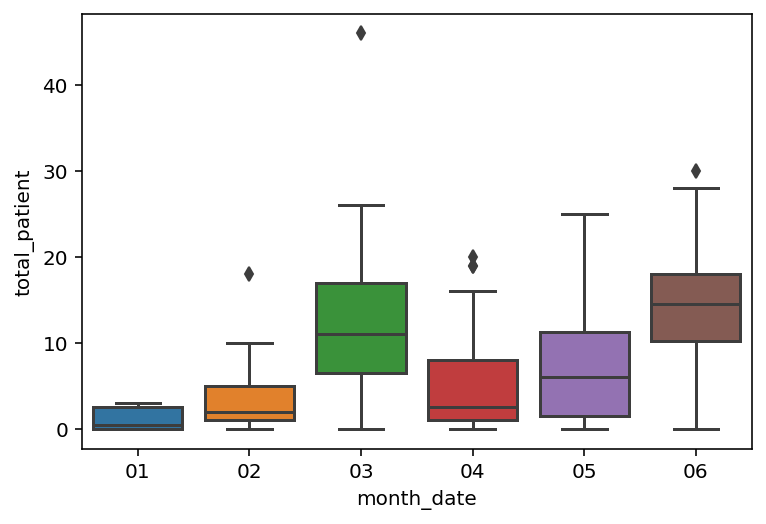

In [99]:
sns.boxplot(x='month_date',y='total_patient', data=list_A)

In [104]:
M_out = pd.merge(T002,list_B, on = ['month_date','year_date'])

In [106]:
M_out 

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,gap,mark,REG_YYMM_01,month_date,year_date,total_patient
0,202001,서울,서초구,버스 운송업,강원,삼척시,10s,2,1,8,76500,11,3,단골있음,2020-01-01,01,2020,7
1,202001,서울,중구,비알콜 음료점업,강원,원주시,10s,2,1,10,66300,11,1,단골있음,2020-01-01,01,2020,7
2,202001,서울,광진구,체인화 편의점,강원,춘천시,10s,2,1,3,11000,3,0,고객다름,2020-01-01,01,2020,7
3,202001,서울,서초구,버스 운송업,강원,강릉시,10s,2,1,11,161700,23,12,단골있음,2020-01-01,01,2020,7
4,202001,서울,중구,비알콜 음료점업,강원,춘천시,10s,2,1,9,74300,12,3,단골있음,2020-01-01,01,2020,7


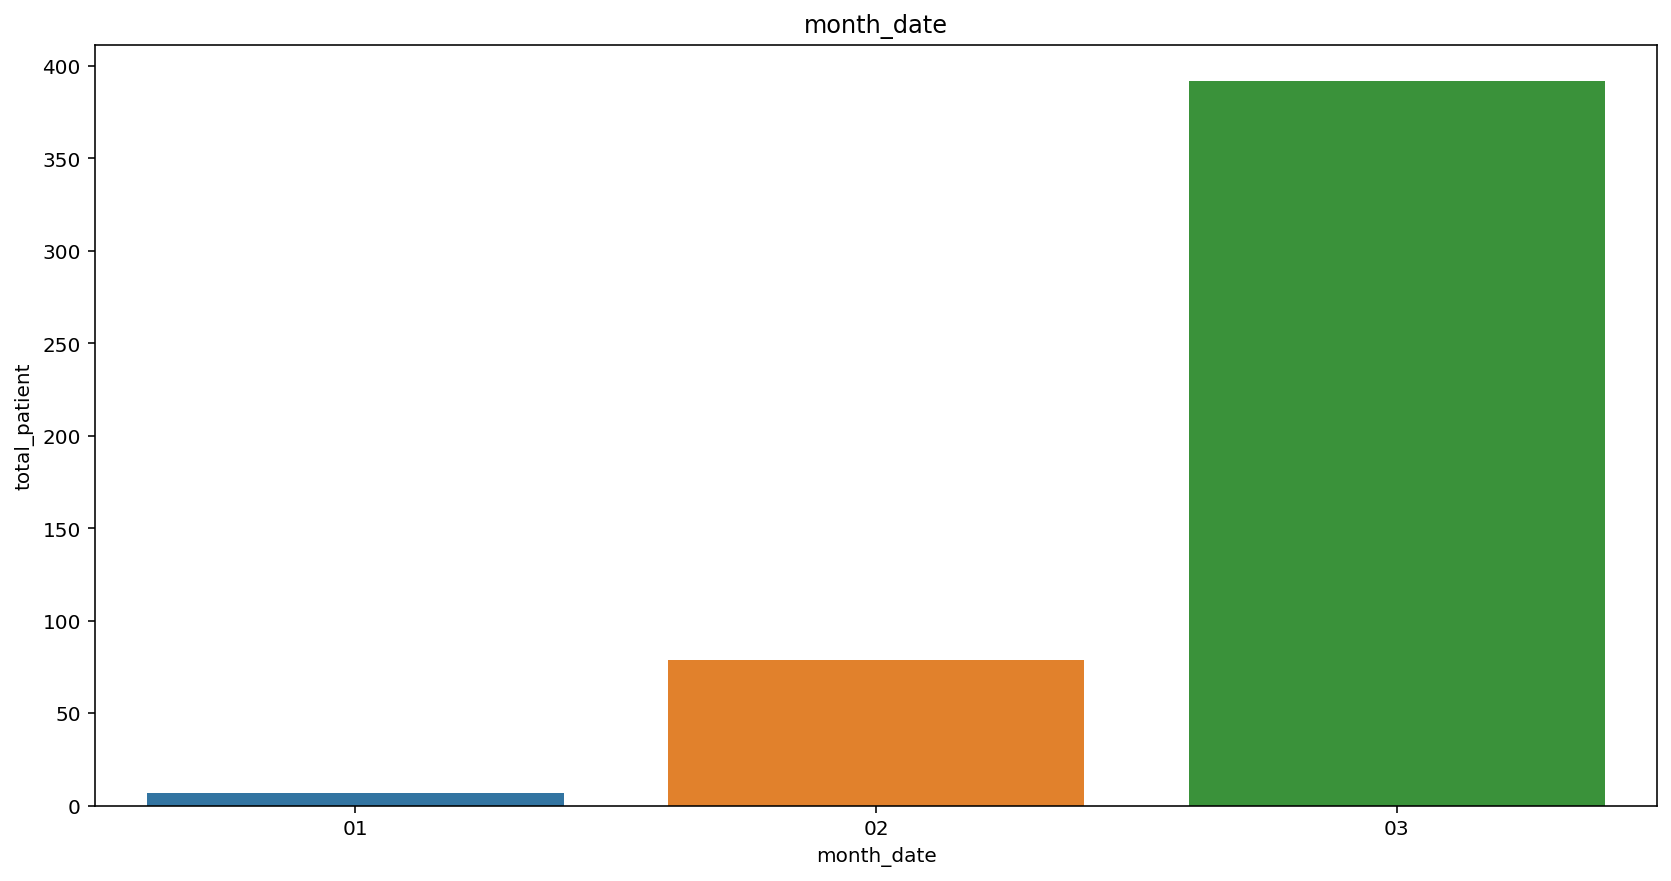

In [108]:
make_bar(M_out, 'month_date', 'total_patient')
# 현재 60%의 데이터를 짤라서 쓰고 있는 중이라, month 가 3월까지 밖에 없다. 코로나 total 데이터에는 1~5월까지의 자료가 있음. 

In [110]:
list_B

year_date  month_date
2020       01              7
           02             79
           03            392
           04            156
           05            228
Name: total_patient, dtype: int64

In [281]:
P001.province.unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggido', 'Sejong', 'Ulsan', 'Gangwondo', 'Chungcheongbukdo',
       'Chungcheongnamdo', 'Jeollabukdo', 'Jeollanamdo',
       'Gyeongsangbukdo', 'Gyeongsangnamdo', 'Jejudo'], dtype=object)

In [282]:
P002

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Gy,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Gy,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Gy,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Gy,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Gy,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [242]:
P001.province.unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggi-do', 'Sejong', 'Ulsan', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [245]:
# >>> s = 'Hello, world!'
# >>> s = s.replace('world!', 'Python')

P001 = P001.province.replace('Gyeonggi-do', 'Gyeonggido')

In [250]:
P00

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [286]:
# 확진자 데이터 S00 만들었던 형태, for문으로 돌리기 

p001 = list(P001['province'].unique())

Corona_by_city=[]
for i in p001:
  globals()['S00_{}'.format(i)]= P001[P001['province']==i]
  Corona_by_city.append('S00_{}'.format(i))
  print('S00_{}'.format(i))

S00_Seoul
S00_Busan
S00_Daegu
S00_Gwangju
S00_Incheon
S00_Daejeon
S00_Gyeonggido
S00_Sejong
S00_Ulsan
S00_Gangwondo
S00_Chungcheongbukdo
S00_Chungcheongnamdo
S00_Jeollabukdo
S00_Jeollanamdo
S00_Gyeongsangbukdo
S00_Gyeongsangnamdo
S00_Jejudo


In [288]:
Seoul =[]
  for date in day_list:
    s001 = S00_Seoul[S00_Seoul['confirmed_date']==date]['patient_id'].value_counts().sum()
    Seoul.append(s001

In [ ]:
#Corona_by_city = "SOO_Seoul, SOO_Busan, ... "

for city in Corona_by_city:
  for date in day_list:
    globals()['list_{}'.format(city)] = city[city['confirmed_date']==date]['patient_id'].value_counts().sum()
    


In [219]:
# p001 = 
# ['Seoul',
#  'Busan',
#  'Daegu',
#  'Gwangju',
#  'Incheon',
#  'Daejeon',
#  'Gyeonggi-do',
#  'Sejong',
#  'Ulsan',
#  'Gangwon-do',
#  'Chungcheongbuk-do',
#  'Chungcheongnam-do',
#  'Jeollabuk-do',
#  'Jeollanam-do',
#  'Gyeongsangbuk-do',
#  'Gyeongsangnam-do',
#  'Jeju-do']

Seoul =[]
for date in day_list:
  s001 = S00_Seoul[S00_Seoul['confirmed_date']==date]['patient_id'].value_counts().sum()
  Seoul.append(s001)

Busan =[]
for date in day_list:
  s001 = S00_Busan[S00_Busan['confirmed_date']==date]['patient_id'].value_counts().sum()
  Busan.append(s001)

Daegu =[]
for date in day_list:
  s001 = S00_Daegu[S00_Daegu['confirmed_date']==date]['patient_id'].value_counts().sum()
  Daegu.append(s001)

Gwangju =[]
for date in day_list:
  s001 = S00_Gwangju[S00_Gwangju['confirmed_date']==date]['patient_id'].value_counts().sum()
  Gwangju.append(s001)

Incheon =[]
for date in day_list:
  s001 = S00_Incheon[S00_Incheon['confirmed_date']==date]['patient_id'].value_counts().sum()
  Incheon.append(s001)

Daejeon =[]
for date in day_list:
  s001 = S00_Daejeon[S00_Daejeon['confirmed_date']==date]['patient_id'].value_counts().sum()
  Daejeon.append(s001)


In [290]:
Gyeonggido =[]
for date in day_list:
  s001 = S00_Gyeonggido[S00_Gyeonggido['confirmed_date']==date]['patient_id'].value_counts().sum()
  Gyeonggido.append(s001)

Sejong =[]
for date in day_list:
  s001 = S00_Sejong[S00_Sejong['confirmed_date']==date]['patient_id'].value_counts().sum()
  Sejong.append(s001)

Ulsan =[]
for date in day_list:
  s001 = S00_Ulsan[S00_Ulsan['confirmed_date']==date]['patient_id'].value_counts().sum()
  Ulsan.append(s001)


In [291]:
Gangwondo =[]
for date in day_list:
  s001 = S00_Gangwondo[S00_Gangwondo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Gangwondo.append(s001)

Chungcheongbukdo =[]
for date in day_list:
  s001 = S00_Chungcheongbukdo[S00_Chungcheongbukdo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Chungcheongbukdo.append(s001)

Chungcheongnamdo =[]
for date in day_list:
  s001 = S00_Chungcheongnamdo[S00_Chungcheongnamdo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Chungcheongnamdo.append(s001)

Jeollabukdo =[]
for date in day_list:
  s001 = S00_Jeollabukdo[S00_Jeollabukdo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Jeollabukdo.append(s001)

Jeollanamdo =[]
for date in day_list:
  s001 = S00_Jeollanamdo[S00_Jeollanamdo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Jeollanamdo.append(s001)

Gyeongsangbukdo =[]
for date in day_list:
  s001 = S00_Gyeongsangbukdo[S00_Gyeongsangbukdo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Gyeongsangbukdo.append(s001)

Gyeongsangnamdo =[]
for date in day_list:
  s001 = S00_Gyeongsangnamdo[S00_Gyeongsangnamdo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Gyeongsangnamdo.append(s001)

Jejudo =[]
for date in day_list:
  s001 = S00_Jejudo[S00_Jejudo['confirmed_date']==date]['patient_id'].value_counts().sum()
  Jejudo.append(s001)



In [293]:
#변수 리스트 
p001

['Seoul',
 'Busan',
 'Daegu',
 'Gwangju',
 'Incheon',
 'Daejeon',
 'Gyeonggido',
 'Sejong',
 'Ulsan',
 'Gangwondo',
 'Chungcheongbukdo',
 'Chungcheongnamdo',
 'Jeollabukdo',
 'Jeollanamdo',
 'Gyeongsangbukdo',
 'Gyeongsangnamdo',
 'Jejudo']

In [312]:
list_sido= []
for i in p001: 
  a = 'list_{}'.format(i)
  list_sido.append(a)
#print('S00_{}'.format(i))

In [313]:
list_sido

['list_Seoul',
 'list_Busan',
 'list_Daegu',
 'list_Gwangju',
 'list_Incheon',
 'list_Daejeon',
 'list_Gyeonggido',
 'list_Sejong',
 'list_Ulsan',
 'list_Gangwondo',
 'list_Chungcheongbukdo',
 'list_Chungcheongnamdo',
 'list_Jeollabukdo',
 'list_Jeollanamdo',
 'list_Gyeongsangbukdo',
 'list_Gyeongsangnamdo',
 'list_Jejudo']

In [297]:
#서울지역 코로나 데이터 컬럼명 수정  
list_Seoul = [ x for x in zip(day_list,Seoul) ]
list_Seoul = pd.DataFrame(list_Seoul)
list_Seoul.columns =["confirmed_date","total_patient"]
#서울지역 코로나 데이터 년, 월 추가 
list_Seoul['confirmed_date'] = pd.to_datetime(list_Seoul.confirmed_date, errors='coerce')
list_Seoul['month_date'] = list_Seoul['confirmed_date'].dt.strftime('%m')
list_Seoul['year_date'] = list_Seoul['confirmed_date'].dt.strftime('%Y')
list_Seoul_g = list_Seoul.groupby(['year_date','month_date'])["total_patient"].sum()

In [330]:
list_Seoul_g

year_date  month_date
2020       01              7
           02             79
           03            392
           04            156
           05            228
           06            450
Name: total_patient, dtype: int64

In [302]:
#부산지역 코로나 데이터 컬럼명 수정  
list_Busan = [ x for x in zip(day_list,Busan) ]
list_Busan = pd.DataFrame(list_Busan)
list_Busan.columns =["confirmed_date","total_patient"]
#서울지역 코로나 데이터 년, 월 추가 
list_Busan['confirmed_date'] = pd.to_datetime(list_Busan.confirmed_date, errors='coerce')
list_Busan['month_date'] = list_Busan['confirmed_date'].dt.strftime('%m')
list_Busan['year_date'] = list_Busan['confirmed_date'].dt.strftime('%Y')
list_Busan_g = list_Busan.groupby(['year_date','month_date'])["total_patient"].sum()

In [344]:
for i, k in zip(p001,list_sido):
  print(i,k)

Seoul list_Seoul
Busan list_Busan
Daegu list_Daegu
Gwangju list_Gwangju
Incheon list_Incheon
Daejeon list_Daejeon
Gyeonggido list_Gyeonggido
Sejong list_Sejong
Ulsan list_Ulsan
Gangwondo list_Gangwondo
Chungcheongbukdo list_Chungcheongbukdo
Chungcheongnamdo list_Chungcheongnamdo
Jeollabukdo list_Jeollabukdo
Jeollanamdo list_Jeollanamdo
Gyeongsangbukdo list_Gyeongsangbukdo
Gyeongsangnamdo list_Gyeongsangnamdo
Jejudo list_Jejudo


In [346]:
# list_sido= []
# for i in p001: 
#   a = 'list_{}'.format(i)
#   list_sido.append(a)
# #print('S00_{}'.format(i))


for i, k in zip(p001,list_sido):
  k = [ x for x in zip(day_list,i) ]
  k = pd.DataFrame(k)
  # k.columns =["confirmed_date","total_patient"]
  # k['confirmed_date'] = pd.to_datetime(k.confirmed_date, errors='coerce')
  # k['month_date'] = k['confirmed_date'].dt.strftime('%m')
  # k['year_date'] = k['confirmed_date'].dt.strftime('%Y')
  
  #globals()['{k}']
  #k_g = k.groupby(['year_date','month_date'])["total_patient"].sum()
  #  globals()['S00_{}'.format(i)]= P001[P001['province']=='i']
  print(k)

            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i
            0  1
0  2020-01-23  i


In [336]:
list_Jejudo

NameError: ignored

In [ ]:
 globals()['list_{}'.format(city)] = city[city['confirmed_date']==date]['patient_id'].value_counts().sum()

In [ ]:
p001 = list(P001['province'].unique())

for i in p001:
  globals()['S00_{}'.format(i)]= P001[P001['province']=='i']
  print('S00_{}'.format(i))

In [305]:
for i in p001: 
  list_i = [ x for x in zip(day_list,i) ]

  
  list_i = pd.DataFrame(list_i)
  list_i.columns =["confirmed_date","total_patient"]
  list_i['confirmed_date'] = pd.to_datetime(list_i.confirmed_date, errors='coerce')
  list_i['month_date'] = list_i['confirmed_date'].dt.strftime('%m')
  list_i['year_date'] = list_i['confirmed_date'].dt.strftime('%Y')
  list_i_g = list_i.groupby(['year_date','month_date'])["total_patient"].sum()

In [306]:
for date in day_list:
  globals()['list_{}'.format(city)] = city[city['confirmed_date']==date]['patient_id'].value_counts().sum()
    

NameError: ignored

In [300]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT',
       'gap', 'mark'],
      dtype='object')

In [210]:
for i,city in p001,Corona_by_city: 
  globals()['LList_{}'.format(i)] = city[city['confirmed_date']==date]['patient_id'].value_counts().sum()

ValueError: ignored

In [205]:
for city in Corona_by_city: 
   A001 = city[city['confirmed_date']==date]['patient_id'].value_counts().sum()

TypeError: ignored

In [181]:
#Corona_by_city = "SOO_Seoul, SOO_Busan, ... "

for city in Corona_by_city:
  for date in day_list:
    globals()['list_{}'.format(city)] = city[city['confirmed_date']==date]['patient_id'].value_counts().sum()
    


TypeError: ignored

In [175]:
for date in day_list:
  a005 = P001[P00]

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [114]:
c001 = T001.CARD_SIDO_NM.unique()

array(['강원', '서울', '경기', '제주', '전북', '인천', '부산', '경남', '충북', '대전', '충남',
       '경북', '광주', '대구', '울산', '전남', '세종'], dtype=object)

,confirmed_date,total_patient,month_date,year_date
0,2020-01-23,1,01,2020
1,2020-01-30,3,01,2020
2,2020-01-31,3,01,2020
3,2020-02-02,1,02,2020
4,2020-02-05,2,02,2020
...,...,...,...,...
144,2020-02-01,0,02,2020
145,2020-02-09,0,02,2020
146,2020-02-10,0,02,2020
147,2020-04-29,0,04,2020


In [ ]:
# for a,i in zip 

for i in c001: 
  a001 = T001[T001['CARD_SIDO_NM']=='i']
  

#서울지역만 한정시켜보자 
T002 = T001[T001['CARD_SIDO_NM']=='서울'] 

In [ ]:
T001.columns

In [ ]:
T002 = T001[T001.CARD_SIDO_NM == '서울']

In [ ]:
T002.head()

In [ ]:
list_A.head()

In [ ]:
# for date in day_list:
#   print(date)

a006=P001[P001['confirmed_date']=='2020-01-30']['patient_id'].value_counts().sum()

a006

In [ ]:
a002.head()

In [ ]:
#P001= pd.read_csv('/content/drive/My Drive/Data_Corona/PatientInfo.csv')

a002 = P001.groupby('confirmed_date')['confirmed_date','patient_id','province']
a002.tail()

In [ ]:
train.tail()

In [ ]:
# patient_id 의 숫자를 합한다. 

#새로운 행 만들기 patient_count_sum 

#a002.value_counts("confirmed_date").head()

#df['species'].nunique()

a002["confirmed_date"].unique()